# Exo classification MNIST

In [1]:
#L'objectif ici est d'avoir un taux de prediction de 97% et non moins

In [2]:
from sklearn.datasets import load_digits
dataset = load_digits()
dataset.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

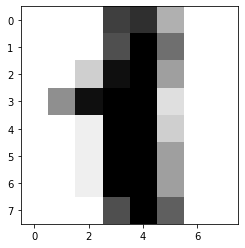

In [9]:
import matplotlib.pyplot as plt
image1 = dataset.images[1]
plt.imshow(image1, cmap="binary")
plt.show()

In [8]:
X, y = dataset["data"], dataset["target"]
print(X.shape, y.shape)

(1797, 64) (1797,)


In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print("les features: {}, {} \nles targets: {}, {}".format(X_train.shape, X_test.shape, y_train.shape, y_test.shape))

les features: (1437, 64), (360, 64) 
les targets: (1437,), (360,)


In [41]:
#Using models svc
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
model_svc = SVC()
model_sgd = SGDClassifier()
model_knc =KNeighborsClassifier()

for model in (model_svc, model_sgd, model_knc):
    model.fit(X_train, y_train)
    print(model.score(X_test, y_test), ", ")

0.9972222222222222 , 
0.9444444444444444 , 
0.9944444444444445 , 


In [54]:
y_train_2 = (y_train == 2)
print(y_train_2 == True)
y_train_2.shape

[False False False ... False False False]


(1437,)

In [43]:
from sklearn.model_selection import cross_val_score
model_svc_predict = cross_val_score(model_svc, X_train, y_train_2, cv=3)
model_sgd_predict = cross_val_score(model_sgd, X_train, y_train_2, cv=3)
model_knc_predict = cross_val_score(model_knc, X_train, y_train_2, cv=3)
print("Le SVC: {} \nLe SGD: {} \nLe KNC: {}".format(model_svc_predict, model_sgd_predict, model_knc_predict))

Le SVC: [1. 1. 1.] 
Le SGD: [0.99373695 1.         0.99164927] 
Le KNC: [0.99791232 1.         1.        ]


In [45]:
#verification de la performance avec la matrice de confusion sur le model_svc
from sklearn.metrics import precision_score, recall_score

precison_svc = precision_score(y_train_2, model_svc_predict)
recall_svc = recall_score(y_train_2, model_svc_predict)
print(f"{precision_svc} \n{recall_svc}")

ValueError: Found input variables with inconsistent numbers of samples: [1437, 3]